### MACHINE LEARNING BASICS
#### k-nearest neighbors machine learning model

#### Prediction of accomodation price in Washington

In [13]:
import pandas as pd
import numpy as np
dc_listings = pd.read_csv('dc_airbnb.csv')
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [14]:
print(dc_listings.iloc[0])

host_response_rate                  92%
host_acceptance_rate                91%
host_listings_count                  26
accommodates                          4
room_type               Entire home/apt
bedrooms                              1
bathrooms                             1
beds                                  2
price                           $160.00
cleaning_fee                    $115.00
security_deposit                $100.00
minimum_nights                        1
maximum_nights                     1125
number_of_reviews                     0
latitude                          38.89
longitude                      -77.0028
city                         Washington
zipcode                           20003
state                                DC
Name: 0, dtype: object


In [15]:
# living space difference of first house for 3 people
first_distance = ((3-dc_listings.iloc[0]["accommodates"])**2)**.5
print(first_distance)

1.0


In [16]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

def predict_price(new_listing):
    temp_df = dc_listings
    temp_df["distance"] = temp_df["accommodates"].apply(lambda x: np.abs(x-new_listing))
    temp_df = temp_df.sort_values("distance")
    return temp_df.iloc[0:5]["price"].mean()

acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)
print("One person accomodation price prediction is :" , acc_one)
print("Two person accomodation price prediction is :" , acc_two)
print("Four person accomodation price prediction is :" , acc_four)

One person accomodation price prediction is : 67.6
Two person accomodation price prediction is : 163.0
Four person accomodation price prediction is : 204.8


### Testing Machine Learning Model with Train/Test Validation

In [2]:
import pandas as pd
import numpy as np
dc_listings = pd.read_csv("dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
train_df = dc_listings.iloc[0:2792]
test_df = dc_listings.iloc[2792:]

def predict_price(new_listing):
    temp_df = train_df
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbor_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbor_prices.mean()
    return(predicted_price)
test_df["predicted_price"] = test_df['accommodates'].apply(lambda x: predict_price(x))


C:\Users\YUNUS-NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\YUNUS-NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
test_df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,predicted_price
2792,20%,75%,1,2,Entire home/apt,0.0,1.0,1.0,120.0,NaN,NaN,1,1125,8,38.922187,-77.032475,Washington,20009,DC,104.0
2793,100%,25%,2,3,Entire home/apt,2.0,2.0,1.0,140.0,$75.00,$150.00,2,1125,7,38.931681,-77.044739,Washington,20010,DC,177.4
2794,NaN,NaN,1,4,Entire home/apt,2.0,1.0,1.0,299.0,NaN,NaN,2,1125,5,38.933765,-77.031488,Washington,20010,DC,145.8
2795,100%,100%,1,3,Entire home/apt,1.0,1.0,1.0,85.0,$30.00,$250.00,1,92,2,38.925692,-77.032616,Washington,20009,DC,177.4
2796,100%,100%,1,6,Entire home/apt,2.0,2.0,3.0,175.0,$65.00,$850.00,1,1125,62,38.927572,-77.033604,Washington,20009,DC,187.2


#### Mean absolute error(MAE)

In [5]:
mae = np.absolute(test_df["price"] - test_df["predicted_price"]).mean()
mae

56.29001074113876

#### Mean squared error (MSE)

In [7]:
mse = ((test_df['predicted_price'] - test_df['price'])**(2)).mean()
print(mse)

18646.525370569325


In [9]:
def predict_price2(new_listing):
    temp_df = train_df
    temp_df['distance'] = temp_df['bathrooms'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors_prices = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors_prices.mean()
    return(predicted_price)
test_df["predicted_price"] = test_df['bathrooms'].apply(lambda x: predict_price2(x))
test_df["squared_error"] = (test_df["price"] - test_df["predicted_price"])**2
mse = test_df["squared_error"].mean()
print(mse)

C:\Users\YUNUS-NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


18405.444081632548


C:\Users\YUNUS-NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\YUNUS-NB\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#### Root mean squared error (RMSE)

In [11]:
rmse = mse**.5
rmse

135.6666653295221

#### Different examples of difference of MAE and RMSE

In [13]:
errors_one = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10])
errors_two = pd.Series([5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 10, 5, 1000])
mae_one = errors_one.mean()
rmse_one = ((errors_one**2).mean())**.5
mae_two = errors_two.mean()
rmse_two = ((errors_two**2).mean())**.5
print("Mean squared error (errors_one)",mae_one)
print("Mean squared error (errors_two)",mae_two)
print("Root mean squared error (errors_one)",rmse_one)
print("Root mean squared error (errors_two)",rmse_two)

Mean squared error (errors_one) 7.5
Mean squared error (errors_two) 62.5
Root mean squared error (errors_one) 7.905694150420948
Root mean squared error (errors_two) 235.82302686548658


#### Identify any columns containing non-numerical or non-ordinal values

In [2]:
import pandas as pd
import numpy as np
np.random.seed(1)

dc_listings = pd.read_csv('dc_airbnb.csv')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 574 to 1061
Data columns (total 19 columns):
host_response_rate      3289 non-null object
host_acceptance_rate    3109 non-null object
host_listings_count     3723 non-null int64
accommodates            3723 non-null int64
room_type               3723 non-null object
bedrooms                3702 non-null float64
bathrooms               3696 non-null float64
beds                    3712 non-null float64
price                   3723 non-null float64
cleaning_fee            2335 non-null object
security_deposit        1426 non-null object
minimum_nights          3723 non-null int64
maximum_nights          3723 non-null int64
number_of_reviews       3723 non-null int64
latitude                3723 non-null float64
longitude               3723 non-null float64
city                    3723 non-null object
zipcode                 3714 non-null object
state                   3723 non-null object
dtypes: float64(6), int64(5), objec

#### Remove non-numerical columns from Dataframe

In [3]:
dc_listings = dc_listings.drop(["room_type","city","state","latitude","longitude","zipcode","host_response_rate","host_acceptance_rate","host_listings_count"],axis=1)
dc_listings.head()

,accommodates,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
574,2,1.0,1.0,1.0,125.0,NaN,$300.00,1,4,149
1593,2,1.0,1.5,1.0,85.0,$15.00,NaN,1,30,49
3091,1,1.0,0.5,1.0,50.0,NaN,NaN,1,1125,1
420,2,1.0,1.0,1.0,209.0,$150.00,NaN,4,730,2
808,12,5.0,2.0,5.0,215.0,$135.00,$100.00,2,1825,34


####  null value counts 

In [4]:
dc_listings = dc_listings.drop(["cleaning_fee","security_deposit"],axis=1)
dc_listings = dc_listings.dropna(axis=0)
dc_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3671 entries, 574 to 1061
Data columns (total 8 columns):
accommodates         3671 non-null int64
bedrooms             3671 non-null float64
bathrooms            3671 non-null float64
beds                 3671 non-null float64
price                3671 non-null float64
minimum_nights       3671 non-null int64
maximum_nights       3671 non-null int64
number_of_reviews    3671 non-null int64
dtypes: float64(4), int64(4)
memory usage: 258.1 KB


#### Standard normal distribution

##### Subtract  mean of column from each value and divide to standard deviation 

In [5]:
normalized_listings = (dc_listings - dc_listings.mean()) / dc_listings.std()
normalized_listings["price"] = dc_listings["price"]
print(normalized_listings.head(3))

      accommodates  bedrooms  bathrooms      beds  price  minimum_nights  \
574      -0.596544 -0.249467  -0.439151 -0.546858  125.0       -0.341375   
1593     -0.596544 -0.249467   0.412923 -0.546858   85.0       -0.341375   
3091     -1.095499 -0.249467  -1.291226 -0.546858   50.0       -0.341375   

      maximum_nights  number_of_reviews  
574        -0.016604           4.579650  
1593       -0.016603           1.159275  
3091       -0.016573          -0.482505  


#### Distance between 2 rows

In [7]:
from scipy.spatial import distance
list1 = normalized_listings.iloc[0][["accommodates","bathrooms"]]
list2 = normalized_listings.iloc[4][["accommodates","bathrooms"]]

first_fifth_distance = distance.euclidean(list1,list2)
first_fifth_distance

5.272543124668404

#### Scikit-learn workflow

In [11]:
from sklearn.neighbors import KNeighborsRegressor

train_df = normalized_listings.iloc[0:2792]
test_df = normalized_listings.iloc[2792:]

knn = KNeighborsRegressor(algorithm = "brute")
knn.fit(train_df[["accommodates","bathrooms"]],train_df["price"])
predictions = knn.predict(test_df[['accommodates', 'bathrooms']])
knn

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

#### Calculating MSE and RMSE with scikit-learn

In [15]:
from sklearn.metrics import mean_squared_error
two_features_mse = mean_squared_error(test_df["price"],predictions)
two_features_rmse = two_features_mse ** .5
print("two_features_mse" , two_features_mse)
print("two_features_rmse" , two_features_rmse)

two_features_mse 15184.425165
two_features_rmse 123.225099574


#### train and test a k-nearest neighbors model using four columns

In [17]:
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[features],train_df["price"])
four_predictions = knn.predict(test_df[features])
four_mse = mean_squared_error(test_df["price"],four_predictions)
four_rmse = four_mse ** .5
print("MSE" , four_mse)
print("RMSE", four_rmse)

MSE 14044.0656655
RMSE 118.507660788


#### train and test a k-nearest neighbors model using all columns

In [18]:
features = train_df.columns.tolist()
features.remove("price")
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')
knn.fit(train_df[features],train_df["price"])
all_features_predictions = knn.predict(test_df[features])
all_features_mse = mean_squared_error(test_df["price"],all_features_predictions)
all_features_rmse = all_features_mse ** .5
print("MSE" , all_features_mse)
print("RMSE", all_features_rmse)

MSE 15392.6253925
RMSE 124.067019761


We can see the difference of predictions on last two examples. it means that choosing more column doesnt occur better prediction. choosing relative columns are more important and useful for guessing better

#### impact of increasing k, the number of nearby neighbors the model uses to make predictions

In [1]:
import pandas as pd
train_df = pd.read_csv("dc_airbnb_train.csv")
test_df = pd.read_csv("dc_airbnb_test.csv")

#### Find MSE when we increase k value from 1 to 5 and see how it effects to change k value

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

hyper_params = [1,2,3,4,5]
mse_values = []
f_col = ["accommodates","bedrooms","bathrooms","number_of_reviews"]
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=i, algorithm='brute')
    knn.fit(train_df[f_col],train_df["price"])
    predictions = knn.predict(test_df[f_col])
    mse = mean_squared_error(test_df["price"],predictions)
    mse_values.append(mse)

print(mse_values)

[26383.244596131968, 15152.847554038681, 14668.32890911389, 16079.745093856654, 14233.643139931741]


#### Increase k value from 1 to 20

In [6]:
hyper_params = [x for x in range(1, 21)]
mse_values2 = list()
f_col = ["accommodates","bedrooms","bathrooms","number_of_reviews"]
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=i, algorithm='brute')
    knn.fit(train_df[f_col],train_df["price"])
    predictions = knn.predict(test_df[f_col])
    mse = mean_squared_error(test_df["price"],predictions)
    mse_values2.append(mse)

mse_values2

[26383.244596131968,
 15152.847554038681,
 14668.32890911389,
 16079.745093856654,
 14233.643139931741,
 13781.359025407659,
 13932.903995727982,
 14015.416293373151,
 14040.643997808958,
 14214.452400455062,
 14323.282373847065,
 14588.854711793701,
 14576.310270546817,
 14573.683493533936,
 14642.491240045507,
 14687.59449214306,
 14719.012451236267,
 14725.675413278275,
 14780.722616672812,
 14755.384158134244]

#### Scatter plot to see which k value has lower MSE

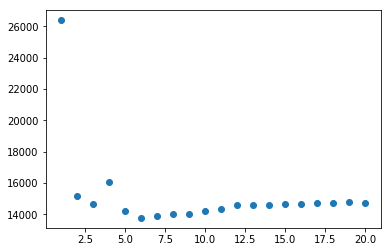

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
hyper_params = [x for x in range(1, 21)]
mse_values = list()

for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df['price'], predictions)
    mse_values.append(mse)
plt.scatter(hyper_params,mse_values)
plt.show()

#### Scatter plot to see which k value has lower MSE for all columns instead

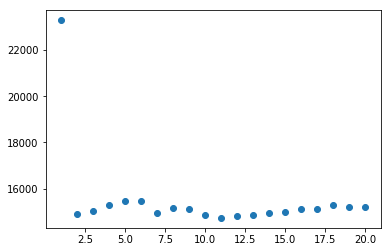

In [9]:
hyper_params = [x for x in range(1,21)]
mse_values = list()

col = train_df.columns.tolist()
col.remove("price")

for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i , algorithm = "brute")
    knn.fit(train_df[col],train_df["price"])
    predictions = knn.predict(test_df[col])
    mse = mean_squared_error(test_df["price"],predictions)
    mse_values.append(mse)
plt.scatter(hyper_params,mse_values)
plt.show()

#### lower k numbers and  lower MSE values to workflow for different column numbers.

In [11]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]

two_mse_values = list()
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()

for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i , algorithm = "brute")
    knn.fit(train_df[two_features],train_df["price"])
    predictions = knn.predict(test_df[two_features])
    mse = mean_squared_error(test_df["price"],predictions)
    two_mse_values.append(mse)

    
two_lowest_mse = two_mse_values[0]
two_lowest_k = 1

for k,mse in enumerate(two_mse_values):
    if mse < two_lowest_mse:
        two_lowest_mse = mse
        two_lowest_k = k + 1
        
for i in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = i , algorithm = "brute")
    knn.fit(train_df[three_features],train_df["price"])
    predictions = knn.predict(test_df[three_features])
    mse = mean_squared_error(test_df["price"],predictions)
    three_mse_values.append(mse)

    
three_lowest_mse = three_mse_values[0]
three_lowest_k = 1

for k,mse in enumerate(three_mse_values):
    if mse < three_lowest_mse:
        three_lowest_mse = mse
        three_lowest_k = k + 1

two_hyp_mse[two_lowest_k] = two_lowest_mse
three_hyp_mse[three_lowest_k] = three_lowest_mse

print("two_hyp_mse",two_hyp_mse)
print("three_hyp_mse",three_hyp_mse)

two_hyp_mse {5: 14875.319590443689}
three_hyp_mse {5: 13494.16850967008}


#### Holdout validation

In [2]:
import numpy as np
import pandas as pd

airbnb = pd.read_csv("dc_airbnb.csv")
stripped_commas = airbnb['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
airbnb['price'] = stripped_dollars.astype('float')

dcindex = np.random.permutation(airbnb.index)
airbnb = airbnb.reindex(dcindex)
split_one = airbnb.iloc[0:1862]
split_two = airbnb.iloc[1862:]
split_one.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
3597,100%,92%,1,4,Entire home/apt,0.0,1.0,2.0,135.0,$35.00,$100.00,2,29,64,38.890416,-76.989529,Washington,20002,DC
704,NaN,NaN,1,1,Private room,1.0,1.0,1.0,1300.0,NaN,NaN,1,1125,0,38.886241,-76.930404,Washington,20019,DC
1869,100%,100%,1,2,Private room,1.0,1.0,1.0,30.0,$25.00,NaN,2,1125,4,38.954695,-76.990072,Washington,20011,DC
1510,NaN,NaN,1,4,Entire home/apt,2.0,2.0,2.0,228.0,$185.00,$800.00,1,1125,10,38.873052,-77.016879,Washington,20024,DC
732,NaN,NaN,1,9,Entire home/apt,5.0,3.5,6.0,850.0,NaN,NaN,1,1125,0,38.931607,-77.091912,Washington,20016,DC


#### train/test each %50 and vice versa

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

knn = KNeighborsRegressor()
knn.fit(train_one[["accommodates"]],train_one["price"])
predictions = knn.predict(test_one[["accommodates"]])
mse_one = mean_squared_error(test_one["price"],predictions)
iteration_one_rmse = mse_one ** .5

knn = KNeighborsRegressor()
knn.fit(train_two[["accommodates"]],train_two["price"])
predictions = knn.predict(test_two[["accommodates"]])
mse_two = mean_squared_error(test_two["price"],predictions)
iteration_two_rmse = mse_two ** .5

avg_rmse = np.mean([iteration_two_rmse,iteration_one_rmse])
print("iteration_one_rmse",iteration_one_rmse)
print("iteration_two_rmse",iteration_two_rmse)
print("avg_rmse",avg_rmse)


iteration_one_rmse 132.27125013
iteration_two_rmse 146.672316112
avg_rmse 139.471783121


In [4]:
airbnb.set_value(airbnb.index[0:743], "fold", 1)
airbnb.set_value(airbnb.index[744:1487], "fold", 2)
airbnb.set_value(airbnb.index[1488:2231], "fold", 3)
airbnb.set_value(airbnb.index[2232:2976], "fold", 4)
airbnb.set_value(airbnb.index[2976:3723], "fold", 5)
airbnb["fold"].value_counts()

5.0    747
4.0    744
3.0    743
2.0    743
1.0    743
Name: fold, dtype: int64

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor()
knn.fit(airbnb[airbnb["fold"] != 1][["accommodates"]],airbnb[airbnb["fold"] != 1]["price"])
labels = knn.predict(airbnb[airbnb["fold"] == 1][["accommodates"]])
mse = mean_squared_error(airbnb[airbnb["fold"] == 1]["price"],labels)
iteration_one_rmse = mse**.5


iteration_one_rmse

172.80224220917049

In [6]:
import numpy as np
fold_ids = [1,2,3,4,5]


def train_and_validate(df,fold):
    knn = KNeighborsRegressor()
    fold_rmses = list()
    for i in fold:
        knn.fit(df[df["fold"] != i][["accommodates"]],df[df["fold"] != i]["price"])
        labels = knn.predict(df[df["fold"] == i][["accommodates"]])
        mse = mean_squared_error(df[df["fold"] == i]["price"],labels)
        rmse = mse ** .5
        fold_rmses.append(rmse)
    return fold_rmses
    
  
rmses = train_and_validate(airbnb,fold_ids)
avg_rmse = np.mean(rmses)

print(rmses)
avg_rmse

[172.80224220917049, 130.28301484434323, 158.22333722132637, 117.68038909901098, 139.04245285084377]


143.60628724493898

#### KFold class

In [10]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(5,shuffle=True,random_state=1)
knn = KNeighborsRegressor()
mses = cross_val_score(knn,airbnb[["accommodates"]],airbnb["price"], scoring="neg_mean_squared_error", cv=kf)

rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)

print(mses)
print(rmses)
avg_rmse

[-29883.64424161 -25707.22904698 -13255.07226846 -17929.89505376
 -18183.46978495]
[ 172.86886429  160.33474061  115.13067475  133.90255806  134.84609666]


143.41658687421915

In [11]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, airbnb[["accommodates"]], airbnb["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  140.922075735 std RMSE:  26.4564815745
5 folds:  avg RMSE:  143.416586874 std RMSE:  20.5802013717
7 folds:  avg RMSE:  146.13706477 std RMSE:  21.6204374418
9 folds:  avg RMSE:  144.552704536 std RMSE:  24.0465906698
10 folds:  avg RMSE:  148.593991427 std RMSE:  25.5182191964
11 folds:  avg RMSE:  145.26061214 std RMSE:  23.878236271
13 folds:  avg RMSE:  149.205787683 std RMSE:  29.4613312118
15 folds:  avg RMSE:  145.595711814 std RMSE:  33.8427912678
17 folds:  avg RMSE:  149.114145882 std RMSE:  27.1060519413
19 folds:  avg RMSE:  145.983326928 std RMSE:  31.1284624736
21 folds:  avg RMSE:  149.636827518 std RMSE:  33.7919200647
23 folds:  avg RMSE:  147.698804018 std RMSE:  30.9438080496
